<h1> p2. 자전거 대여량 예측  </h1>
- 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측
1. 데이터 가져오기
2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
3. year, month, day, hour, minute, second 데이터 개수 시각화하기
4. X, y 컬럼 선택 및 train/test 데이터 분리
5. LinearRegression 모델 학습
6.  학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

```
Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```


In [2]:
## library import

In [150]:
#LIBARRY
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

## data import

In [36]:
# data import train , test data
trainData = pd.read_csv("./bike-sharing-demand/train.csv")
 trainData.shape

((6493, 9), (10886, 12))

In [39]:
# data check
trainData.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
print(trainData.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


## datetime 컬럼 datetime 자료형으로 변환하고 연월일시분초 6가지 컬럼 생성하기


In [96]:
#trainData['datetime']
trainData['datetime'] = pd.to_datetime(trainData['datetime'],  format='%Y-%m-%d %H:%M:%S', errors='raise')
# 컬럼 생성
trainData['year'] = trainData['datetime'].dt.year
trainData['month'] = trainData['datetime'].dt.month
trainData['day'] = trainData['datetime'].dt.day
trainData['hour'] = trainData['datetime'].dt.hour
trainData['minute'] = trainData['datetime'].dt.minute
trainData['second'] = trainData['datetime'].dt.second



trainData

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,minute,second,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,0,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,0,0,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,0,0,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,0,0,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,0,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,0,0,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,0,0,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,0,0,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,0,0,2012


## year, month, day, hour, minute, second 데이터 개수 시각화하기

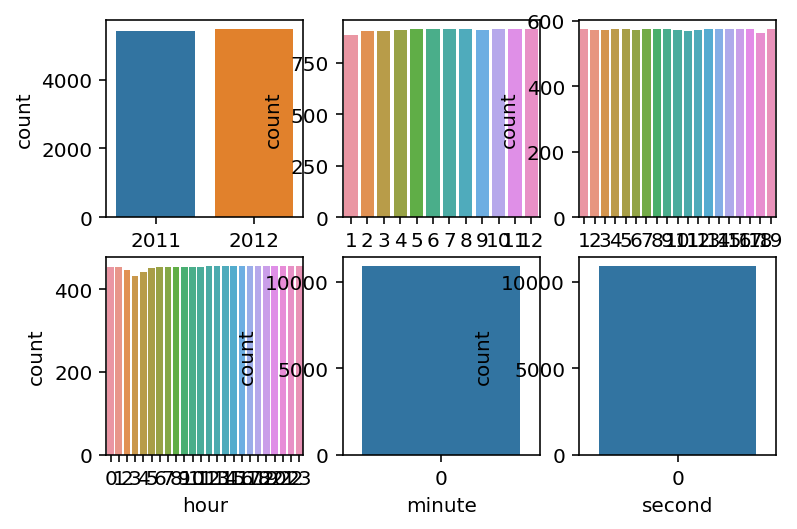

In [64]:
#data 개수 시각화

plt.subplot(2,3,1)
sns.countplot(x="year", data=trainData)
plt.subplot(2,3,2)
sns.countplot(x="month", data=trainData)
plt.subplot(2,3,3)
sns.countplot(x="day", data=trainData)
plt.subplot(2,3,4)
sns.countplot(x="hour", data=trainData)
plt.subplot(2,3,5)
sns.countplot(x="minute", data=trainData)
plt.subplot(2,3,6)
sns.countplot(x="second", data=trainData)
#subplot

## X, y 컬럼 선택 및 train/test 데이터 분리

In [164]:
# x 데이터,,,,,
'''
    ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
      'year','month','day','hour','minute','second'
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
       
       문제: 날씨가 좋은 월요일 오후 세시 자전거 타는 사람은...
       -시간 분 초 데이터 0 제외 년도 제외
       - 등록여부 제외 
       - 휴일, 평일 제외 어차피 요일
       - 달 날짜 제외 
       - 시즌 제외 날씨...
       - 섭시 제외
          'weather', 'temp',
      'hour' 'humidity', 'windspeed', 
       
       '''
df_x = trainData[['weather','temp','humidity','windspeed','hour','season']].values
df_y = trainData["count"].values

#spilt
X_train, X_test,  y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state =8)
# 이미 분리되어 있음.파일로 



#df_t_y = testData["count"].values
#test data dat
#testData

## LinearRegression 모델 학습 sklearn - l

In [165]:
# model init
model = LinearRegression()

In [166]:
# model fit training
model.fit(df_x, df_y)

LinearRegression()

## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [167]:
# 학습된 모델로 예측값
predictions = model.predict(X_test)
predictions

array([ 83.65396594, 293.02345779, 217.01107298, ..., 416.77784775,
       341.60423382, 111.06999391])

In [168]:
#손실 함수 계산 mse / rmse
mse = mean_squared_error(y_test, predictions)
print("mse", mse)

rmse = mse ** 0.5
print("rmse", rmse)

mse 22235.089245548414
rmse 149.11434956283856


## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

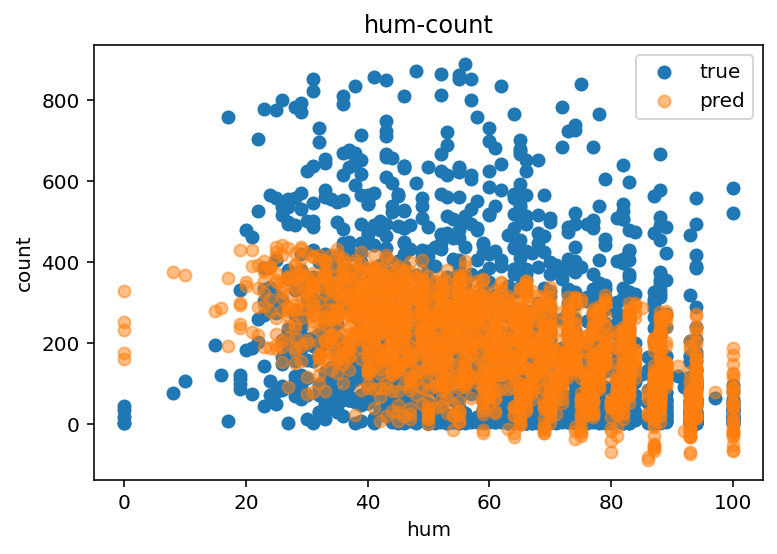

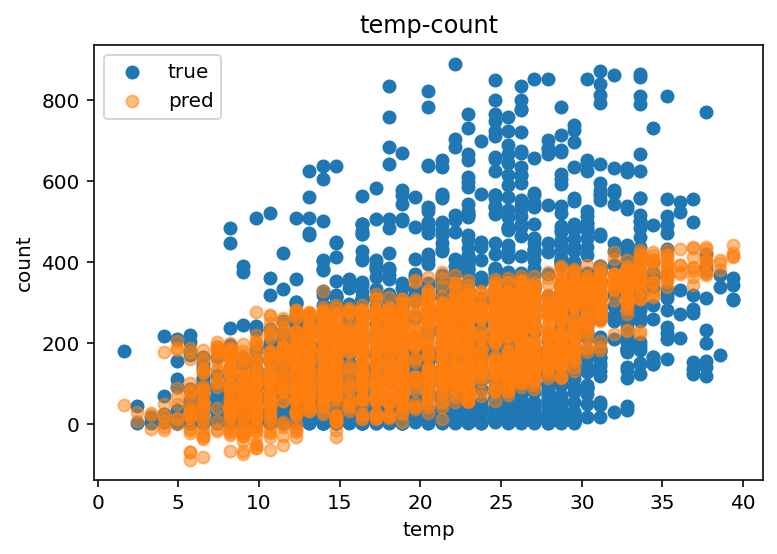

In [169]:
# 그래프로
# 온도

plt.title("hum-count")
plt.xlabel("hum")
plt.ylabel("count")
plt.scatter(X_test[:, 2], y_test, label="true") # x- y실제값
plt.scatter(X_test[:, 2], predictions, label="pred", alpha=0.5)# x-y예측값
plt.legend() # 범례
plt.show()

# 습도


plt.title("temp-count")
plt.xlabel("temp")
plt.ylabel("count")
plt.scatter(X_test[:, 1], y_test, label="true") # x- y실제값
plt.scatter(X_test[:, 1], predictions, label="pred", alpha=0.5)# x-y예측값
plt.legend() # 범례
plt.show()

## test csv 의 예측 데이터 산출해보기

In [170]:
testData = pd.read_csv("./bike-sharing-demand/test.csv")

print(testData.columns)

#test data 도 해주기
#trainData['datetime']
testData['datetime'] = pd.to_datetime(testData['datetime'],  format='%Y-%m-%d %H:%M:%S', errors='raise')
# 컬럼 생성
testData['year'] = testData['datetime'].dt.year
testData['month'] = testData['datetime'].dt.month
testData['day'] = testData['datetime'].dt.day
testData['hour'] = testData['datetime'].dt.hour
testData['minute'] = testData['datetime'].dt.minute
testData['second'] = testData['datetime'].dt.second

testData.head()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [172]:
df_t_x = testData[['weather','temp','humidity','windspeed','hour','season']].values

test_csv_p = model.predict(df_t_x)
test_csv_p

#예측 값 붙이기
testData["y-count"] = test_csv_p
testData[['weather','temp','humidity','windspeed','hour','y-count']]


,weather,temp,humidity,windspeed,hour,y-count
0,1,10.66,56,26.0027,0,20.885425
1,1,10.66,56,0.0000,1,23.311162
2,1,10.66,56,0.0000,2,30.924520
3,1,10.66,56,11.0014,3,40.732692
4,1,10.66,56,11.0014,4,48.346051
...,...,...,...,...,...,...
6488,2,10.66,60,11.0014,19,150.491775
6489,2,10.66,60,11.0014,20,158.105133
6490,1,10.66,60,11.0014,21,168.926814
6491,1,10.66,56,8.9981,22,184.986832
